In [1]:

import numpy as np
import math
import matplotlib.pyplot as plt
#Initialize transformation matrix for predictions
#bm, br, bl, tr, tl
print('bm', 'br', 'bl', 'tr', 'tl')
T_expected_narrow = np.reshape([.5, 0, 0, .25, .25, 
                                0, 0, .75, .25, 0, 
                                0, .75, 0, 0, .25, 
                                .25, .25, 0, 0, .5, 
                                .25, 0, .25, .5, 0], (5, 5))
print(T_expected_narrow)
T_eb = np.vstack([T_expected_narrow[0], 
                             (T_expected_narrow[1] + T_expected_narrow[2]) , 
                             (T_expected_narrow[3] + T_expected_narrow[4])])
T_expected_broad = np.column_stack([T_eb[:, 0], 
                             (T_eb[:, 1]+ T_eb[:, 2]), 
                             (T_eb[:, 3]+ T_eb[:, 4])])
T_expected_broad_norm  = np.vstack([T_expected_broad[0]/np.sum(T_expected_broad[0]), 
                              T_expected_broad[1]/np.sum(T_expected_broad[1]), 
                              T_expected_broad[2]/np.sum(T_expected_broad[2])])
print('bm', 'b', 't')
print(T_expected_broad, np.sum(T_expected_broad, axis = 0), np.sum(T_expected_broad, axis = 1))
print(T_expected_broad_norm, np.sum(T_expected_broad_norm, axis = 0), np.sum(T_expected_broad_norm, axis = 1))

bm br bl tr tl
[[0.5  0.   0.   0.25 0.25]
 [0.   0.   0.75 0.25 0.  ]
 [0.   0.75 0.   0.   0.25]
 [0.25 0.25 0.   0.   0.5 ]
 [0.25 0.   0.25 0.5  0.  ]]
bm b t
[[0.5 0.  0.5]
 [0.  1.5 0.5]
 [0.5 0.5 1. ]] [1. 2. 2.] [1. 2. 2.]
[[0.5  0.   0.5 ]
 [0.   0.75 0.25]
 [0.25 0.25 0.5 ]] [0.75 1.   1.25] [1. 1. 1.]


In [2]:
# np.linalg expects a right matrix but I created a left matrix above, so I use the transpose for the eigenvalue calculation
eigvals, eigvecs = np.linalg.eig(T_expected_narrow.T)
eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
eigvec_one = eigvecs[:, eig_one_index]
evec_one = eigvec_one / eigvec_one[0]
print("Eigenvector for eigenvalue 1")
print(evec_one)

Eigenvector for eigenvalue 1
[1. 1. 1. 1. 1.]


In [3]:
# np.linalg expects a right matrix but I created a left matrix above, so I use the transpose for the eigenvalue calculation
eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
eigvec_one = eigvecs[:, eig_one_index]
evec_one = eigvec_one / eigvec_one[0]
print("Eigenvector for eigenvalue 1")
print(evec_one)

Eigenvector for eigenvalue 1
[1. 2. 2.]


In [4]:
#narrow observations array
T_ob = np.asarray([[8.09031044, 1.31702728, 1.41110066, 2.82220132, 3.01034807],
 [3.66886171, 7.05550329, 6.67920978, 3.76293509, 1.97554092],
 [2.16368768, 6.02069614, 8.46660395, 3.19849483, 3.19849483],
 [4.60959548, 2.0696143,  3.95108184, 4.32737535, 3.95108184],
 [4.1392286,  2.72812794, 2.91627469, 3.2925682,  5.17403575]])
T_ob_norm = np.vstack([T_ob[i]/np.sum(T_ob[i]) for i in range(len(T_ob))])
print(T_ob, '\n', np.around(T_ob_norm, 2), np.sum(T_ob_norm, axis = 1), np.sum(T_ob_norm, axis = 0))
eigvals, eigvecs = np.linalg.eig(T_ob_norm.T)
eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
eigvec_one = eigvecs[:, eig_one_index]
evec_one = np.around(eigvec_one*100 / np.sum(eigvec_one), 1)
print("\nEigenvector for eigenvalue 1 of T_ob_norm:")
print(evec_one)

[[8.09031044 1.31702728 1.41110066 2.82220132 3.01034807]
 [3.66886171 7.05550329 6.67920978 3.76293509 1.97554092]
 [2.16368768 6.02069614 8.46660395 3.19849483 3.19849483]
 [4.60959548 2.0696143  3.95108184 4.32737535 3.95108184]
 [4.1392286  2.72812794 2.91627469 3.2925682  5.17403575]] 
 [[0.49 0.08 0.08 0.17 0.18]
 [0.16 0.3  0.29 0.16 0.09]
 [0.09 0.26 0.37 0.14 0.14]
 [0.24 0.11 0.21 0.23 0.21]
 [0.23 0.15 0.16 0.18 0.28]] [1. 1. 1. 1. 1.] [1.20887506 0.90413586 1.10945963 0.88013675 0.8973927 ]

Eigenvector for eigenvalue 1 of T_ob_norm:
[25.5-0.j 17.6-0.j 21.7-0.j 17.4-0.j 17.8-0.j]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


In [5]:
# Impossible transitions - where none was predicted, but it happened -> the transition happened by breaking off, not by moving along surface
impossible = np.zeros((5,5))
impossible[T_expected_narrow == 0] = T_ob_norm[T_expected_narrow == 0]
#impossible[T_expected_narrow != 0] = 0
print(np.around(impossible,2))

[[0.   0.08 0.08 0.   0.  ]
 [0.16 0.3  0.   0.   0.09]
 [0.09 0.   0.37 0.14 0.  ]
 [0.   0.   0.21 0.23 0.  ]
 [0.   0.15 0.   0.   0.28]]


In [6]:
#broad observations array
T_obb = np.asarray([[8.09031044, 1.31702728, 1.41110066, 2.82220132, 3.01034807],
 [3.66886171, 7.05550329, 6.67920978, 3.76293509, 1.97554092],
 [2.16368768, 6.02069614, 8.46660395, 3.19849483, 3.19849483],
 [4.60959548, 2.0696143,  3.95108184, 4.32737535, 3.95108184],
 [4.1392286,  2.72812794, 2.91627469, 3.2925682,  5.17403575]])
T_eb = np.vstack([T_obb[0], 
                             (T_obb[1] + T_obb[2]) , 
                             (T_obb[3] + T_obb[4])])
T_obb = np.column_stack([T_eb[:, 0], 
                             (T_eb[:, 1]+ T_eb[:, 2]), 
                             (T_eb[:, 3]+ T_eb[:, 4])])
T_obb_norm = np.vstack([T_obb[i]/np.sum(T_obb[i]) for i in range(len(T_obb))])
print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
eigvec_one = eigvecs[:, eig_one_index]
evec_one = np.around(eigvec_one*100 / np.sum(eigvec_one), 1)
print("Eigenvector for eigenvalue 1 of T_obb_norm:")
print(evec_one, eigvec_one, eigvecs, eigvals)

[[ 8.09031044  2.72812794  5.83254939]
 [ 5.83254939 28.22201316 12.13546567]
 [ 8.74882408 11.66509877 16.74506114]] 
 [[0.49 0.16 0.35]
 [0.13 0.61 0.26]
 [0.24 0.31 0.45]] [1. 1. 1.]
Eigenvector for eigenvalue 1 of T_obb_norm:
[25.7 39.2 35.1] [-0.43898959 -0.66895335 -0.5998246 ] [[-0.43898959 -0.56437202 -0.41274241]
 [-0.66895335  0.79317834 -0.40373762]
 [-0.5998246  -0.22880632  0.81648003]] [1.         0.40386228 0.1436443 ]


In [7]:
# Impossible transitions - where none was predicted, but it happened -> the transition happened by breaking off, not by moving along surface
impossible = np.zeros((3,3))
impossible[T_expected_broad == 0] = T_obb[T_expected_broad == 0]
#impossible[T_expected_narrow != 0] = 0
print(impossible)



[[0.         2.72812794 0.        ]
 [5.83254939 0.         0.        ]
 [0.         0.         0.        ]]


In [8]:
def ratio(row):
    sums = np.sum(row)
    if sums > 0:
        return row/sums
    else:
        return row

[20.0, 25.0, 30.0, 35.0, 40.0]

TRANSITION THRESHOLD  20.0
[[115.  55.]
 [ 52. 201.]] 
 [[0.68 0.32]
 [0.21 0.79]] [1. 1.]
[44.10020925 55.89979075] [38.8486047 61.1513953] [44.10020925 55.89979075]

TRANSITION THRESHOLD  25.0
[[103.  55.]
 [ 52. 171.]] 
 [[0.65 0.35]
 [0.23 0.77]] [1. 1.]
[44.25412953 55.74587047] [40.11522875 59.88477125] [44.25412953 55.74587047]

TRANSITION THRESHOLD  30.0
[[ 94.  55.]
 [ 52. 150.]] 
 [[0.63 0.37]
 [0.26 0.74]] [1. 1.]
[44.41491129 55.58508871] [41.08601124 58.91398876] [44.41491129 55.58508871]

TRANSITION THRESHOLD  35.0
[[ 85.  55.]
 [ 52. 132.]] 
 [[0.61 0.39]
 [0.28 0.72]] [1. 1.]
[44.48757764 55.51242236] [41.83908046 58.16091954] [44.48757764 55.51242236]

TRANSITION THRESHOLD  40.0
[[ 78.  55.]
 [ 52. 120.]] 
 [[0.59 0.41]
 [0.3  0.7 ]] [1. 1.]
[44.43958734 55.56041266] [42.23253542 57.76746458] [44.43958734 55.56041266]


Text(0, 0.5, 'observed probability of transition')

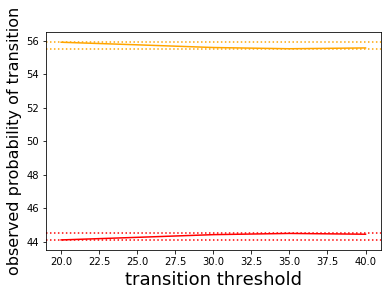

In [9]:
#broad observations array
trans_runs= np.load('trans_runs_transparentd.npy')[()]
num_top_keys = 4
num_full_keys = 6
num_tran_keys = 5
inds =  list(np.linspace(20, 40, 5))
print(inds)
x1 = []
x2 = []
for trans_fil in range(len(inds)):
    
    #Top_bottoms, Full_classif, N_transitions = trans_runs[trans_fil]
    Top_bottoms, Full_classif, N_transitions, trans_threshes, num_top_keys, num_full_keys, num_tran_keys, skeys, ckeys, num_tran_keys, num_total_frames = trans_runs[trans_fil][0]
    print("\nTRANSITION THRESHOLD ", trans_threshes[0])
    sums = np.sum
    Tb_sums = [sums(Top_bottoms[:, c]) for c in range(num_top_keys)]
    Fc_sums = [sums(Full_classif[:, c]) for c in range(num_full_keys)]
    Nt_sums = sums(N_transitions, axis = 0)#[sums(N_transitions[:, c]) for c in range(num_tran_keys)]
    T_obb = Nt_sums
    T_obb_norm = np.vstack([T_obb[i]/np.sum(T_obb[i]) for i in range(len(T_obb))])
    print(T_obb, '\n', np.around(T_obb_norm, 2), np.sum(T_obb_norm, axis=1))
    eigvals, eigvecs = np.linalg.eig(T_obb_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    counts =  ratio(np.sum(T_obb_norm, axis=0))*100
    print(counts,evec_one, np.sum(T_obb_norm, axis=0)*100/np.sum(T_obb_norm))
    #print("Eigenvector for eigenvalue 1 of T_obb_norm:")
    #print(evec_one, eigvec_one, eigvecs, eigvals)
    x1.append(counts[0])
    x2.append(counts[1])
    
vec_t = x1
vec_c = x2
c1 = 'red'
c2 = 'orange'
plt.plot(inds, x1, c = c1, ls = '-')
plt.plot(inds, x2, c = c2, ls = '-')

plt.axhline(y=min(x1), c = c1, ls = ':')
plt.axhline(y=min(x2), c = c2, ls = ':')
plt.axhline(y=max(x1), c = c1, ls = ':')
plt.axhline(y=max(x2), c = c2, ls = ':')
plt.xlabel('transition threshold', fontsize=18)
plt.ylabel('observed probability of transition', fontsize=16)
#plt.ylim(0, 50)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')

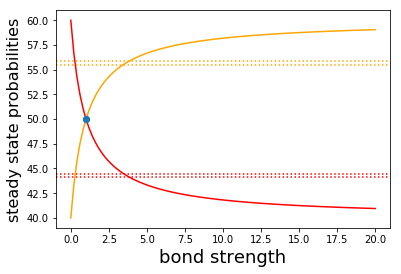

In [10]:
"tESTING HYPOTHESIS WITH all position, early state unimportant, end sate proportional to bond strengths"
#narrow observations array
alphas = np.linspace(0, 20, 100)
x1 = []
x2 = []
x3 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    T_expected_narrow = np.asarray([[2*i + 3, 3*i + 2],
     [2*i + 3, 3*i + 2]])
    T_expected_broad = T_expected_narrow
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
c1 = 'red'
c2 = 'orange'
plt.plot(alphas, x1, c = c1, ls = '-')
plt.plot(alphas, x2, c = c2, ls = '-')

plt.axhline(y=min(vec_t), c = c1, ls = ':')
plt.axhline(y=min(vec_c), c = c2, ls = ':')
plt.axhline(y=max(vec_t), c = c1, ls = ':')
plt.axhline(y=max(vec_c), c = c2, ls = ':')
plt.xlabel('bond strength', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1),(50, 50), 'o')

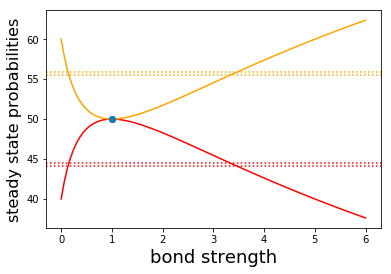

In [11]:
##### "tESTING HYPOTHESIS WITH all 2 positions for particle to swing to"
#narrow observations array

alphas = np.linspace(0, 6, 100)#[ 0.5, 0.6, 0.7, 0.8, 1, 1.25, 1.3, 1.4, 2, 5]
x1 = []
x2 = []
x3 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    T_expected_narrow = np.asarray([[4*i, 2*i + 2],
     [4, 2*i + 2]])
    T_expected_broad = T_expected_narrow
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
c1 = 'red'
c2 = 'orange'
plt.plot(alphas, x1, c = c1, ls = '-')
plt.plot(alphas, x2, c = c2, ls = '-')

plt.axhline(y=min(vec_t), c = c1, ls = ':')
plt.axhline(y=min(vec_c), c = c2, ls = ':')
plt.axhline(y=max(vec_t), c = c1, ls = ':')
plt.axhline(y=max(vec_c), c = c2, ls = ':')
plt.xlabel('bond strength', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1),(50, 50), 'o')

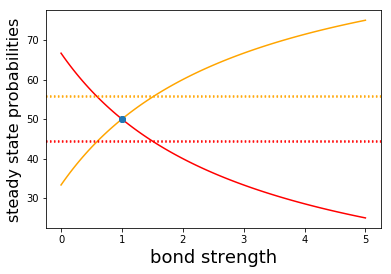

In [12]:
"tESTING HYPOTHESIS WITH 2 positions for particle to swing to (no swing back to old state), and original state matters"
#narrow observations array
alphas = np.linspace(0,5, 100)
x1 = []
x2 = []
x3 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    T_expected_narrow = np.asarray([[2, i + 1],
     [4/(i+1), 2]])
    T_expected_broad = T_expected_narrow
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
c1 = 'red'
c2 = 'orange'
plt.plot(alphas, x1, c = c1, ls = '-')
plt.plot(alphas, x2, c = c2, ls = '-')

plt.axhline(y=min(vec_t), c = c1, ls = ':')
plt.axhline(y=min(vec_c), c = c2, ls = ':')
plt.axhline(y=max(vec_t), c = c1, ls = ':')
plt.axhline(y=max(vec_c), c = c2, ls = ':')
plt.xlabel('bond strength', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1),(50, 50), 'o')

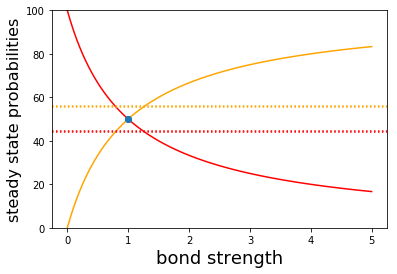

In [13]:


"tESTING HYPOTHESIS WITH break apart and both weights"
#narrow observations array
fig, ax = plt.subplots()
plt.ylim(0, 100)
alphas = np.linspace(0, 5, 100)
x1 = []
x2 = []
x3 = []
for i in alphas:
    #print('\nalpha = %s' %i)
    #print(tm)
    t = (2/((1+i)*(2+2*i))+
         4*i/((1+i)*(2+2*i)*(4+2*i))+
          2*i/((1+i)*(4+2*i)))
    #print(bm)
    c = (2*i/((1+i)*(4+2*i))+
          i*(2+2*i)/((1+i)*(4+2*i)))
    
    T_expected_narrow = np.asarray([[t, c],
     [t, c]])
    T_expected_broad = T_expected_narrow
    T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
    #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
    eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
    eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
    eigvec_one = eigvecs[:, eig_one_index]
    evec_one = eigvec_one*100 / np.sum(eigvec_one)
    #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
    #print(evec_one)
    #plt.plot((i, i, i), (evec_one), 'x')
    x1.append(evec_one[0])
    x2.append(evec_one[1])
c1 = 'red'
c2 = 'orange'
plt.plot(alphas, x1, c = c1, ls = '-')
plt.plot(alphas, x2, c = c2, ls = '-')

plt.axhline(y=min(vec_t), c = c1, ls = ':')
plt.axhline(y=min(vec_c), c = c2, ls = ':')
plt.axhline(y=max(vec_t), c = c1, ls = ':')
plt.axhline(y=max(vec_c), c = c2, ls = ':')
plt.xlabel('bond strength', fontsize=18)
plt.ylabel('steady state probabilities', fontsize=16)
#plt.plot((1, 1, 1),(23, 42, 35), 'x')
plt.plot((1, 1),(50, 50), 'o')

Text(0.5, 0, 'proprtion of hinge motion')

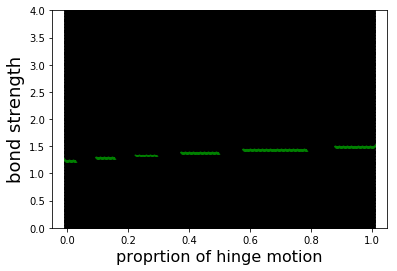

In [14]:


"tESTING HYPOTHESIS WITH break apart and both weights"
#narrow observations array
fig, ax = plt.subplots()
plt.ylim(0, 100)
alphas = np.linspace(0, 4, 80)
ratios = np.linspace(0, 1, 80)
tolerances = [(min(vec_t), max(vec_t)), (min(vec_c), max(vec_c))]

x1 = []
x2 = []
x3 = []
for i in alphas:
    for r in ratios:
        #print('\nalpha = %s' %i)
        #print(tm)
        t = (2/((1+i)*(2+2*i))+
             4*i/((1+i)*(2+2*i)*(4+2*i))+
              2*i/((1+i)*(4+2*i)))
        #print(bm)
        c = (2*i/((1+i)*(4+2*i))+
              i*(2+2*i)/((1+i)*(4+2*i)))

        T2 = np.asarray([[t, c],
         [t, c]])
        T1 = np.asarray([[2, i + 1],
         [4/(i+1), 2]])
        T_expected_narrow = r*T1 + (1-r)*T2
        #print(T_expected_narrow)
        T_expected_broad = T_expected_narrow
        T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
        #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
        eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
        #print(evec_one)
        #plt.plot((i, i, i), (evec_one), 'x')
        test = all((evec_one[i]> tolerances[i][0] and evec_one[i]< tolerances[i][1])  for i in range(len(evec_one)))
        if test:
            col = "green"
        else:
            col = "k"
        plt.plot(r, i, c=col, marker='o')
plt.ylim(0, 4)
plt.ylabel('bond strength', fontsize=18)
plt.xlabel('proprtion of hinge motion', fontsize=16)

Text(0.5, 0, 'proprtion of hinge motion')

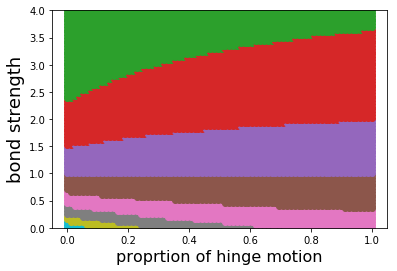

In [15]:


"tESTING HYPOTHESIS WITH break apart and both weights"
#narrow observations array
fig, ax = plt.subplots()
plt.ylim(0, 100)
alphas = np.linspace(0.001, 4, 80)
ratios = np.linspace(0.001, 1, 80)
for i in alphas:
    for r in ratios:
        #print('\nalpha = %s' %i)
        #print(tm)
        t = (2/((1+i)*(2+2*i))+
             4*i/((1+i)*(2+2*i)*(4+2*i))+
              2*i/((1+i)*(4+2*i)))
        #print(bm)
        c = (2*i/((1+i)*(4+2*i))+
              i*(2+2*i)/((1+i)*(4+2*i)))

        T2 = np.asarray([[t, c],
         [t, c]])
        T1 = np.asarray([[2, i + 1],
         [4/(i+1), 2]])
        T_expected_narrow = r*T1 + (1-r)*T2
        #print(T_expected_narrow)
        T_expected_broad = T_expected_narrow
        T_expected_broad_norm = np.vstack([T_expected_broad[i]/np.sum(T_expected_broad[i]) for i in range(len(T_expected_broad))])
        #print(T_expected_broad_norm, '\n\n', np.around(T_expected_broad_norm, 2))
        eigvals, eigvecs = np.linalg.eig(T_expected_broad_norm.T)
        eig_one_index = [x for x in range(len(eigvals)) if math.isclose(eigvals[x], 1.0, abs_tol = .0001)][0]
        eigvec_one = eigvecs[:, eig_one_index]
        evec_one = eigvec_one*100 / np.sum(eigvec_one)
        #print("Eigenvector for eigenvalue 1 of T_ob_norm:")
        #print(evec_one, int(evec_one[0]//10 -0.001), evec_one[0]//10 )
        #plt.plot((i, i, i), (evec_one), 'x')
        plt.plot(r, i, c='C' + str(int(evec_one[0]/10)), marker='o')#, cmap=plt.cm.get_cmap('RdBu'), marker='o')
plt.ylim(0, 4)
plt.ylabel('bond strength', fontsize=18)
plt.xlabel('proprtion of hinge motion', fontsize=16)

#sample initial distributions of states, given 50 steps to equalize to a stady state
reps = 50
trials = 6
for i in range(trials):
    x0 = np.random.random_integers(0, 10, 5) 
    x0 = x0*100/sum(x0)
    xs = np.zeros((len(x0), reps))
    xs[:,0] = x0
    ys = [0]
    T = T_expected_narrow
    for rep in range(1, reps):
        x_rep = T.dot(xs[:, rep-1])
        #print(x_rep)
        xs[:, rep] = x_rep
        ys.append(rep)
    #print(xs)
    fig, ax = plt.subplots()
    ax.plot(ys, xs[0],'.', ys, xs[1], '.', ys,xs[2],'.', ys,xs[3],'.', ys, xs[4], '.')
